***SSMIF FALL 2024 CODING CHALLENGE: POLYMARKET***

Thank you for attempting the SSMIF Fall 2024 Coding Challenge! Attached to this challenge will be a pdf with the rules and guidelines for the challenge.  

ADDITIONAL RULES

- As mentioned above, machine learning will only be permitted for Palladium. The rest of the goods should have systematic and statistically backed signals
- Feel free to add additional cells to seperate code as needed
- Clearly comment your code and explain your thought process thoroughly. Utilizing markdowns to further explain your code will also work
-


**Part I: Constructor and Data Cleaning**
With the data provided, please write a clean_data function to remove any inconsistencies in the data. This cleaned data will be the basis of the future parts of the challenge.

Create a constructor that reads in the excel file and calls all necessary methods. You may set the output of these methods to be attributes of the class that you may access later on in other challenges.

In [15]:
import pandas as pd
import re
from google.colab import files

# Manually upload the files
# uploaded = files.upload()

# Function to clean data, removes unwanted symbols, strange values, and forward fills missing cells
def clean_data(df):
    # rename the first unnamed column to 'Day' if it exists
    if df.columns[0]:
        df.rename(columns={df.columns[0]: 'Day'}, inplace=True)

    # Remove unwanted symbols except '-' and '.' using regular expressions for other columns
    for col in df.columns:
        if col == 'Low?':
            df.rename(columns = {col:'Low'}, inplace = True)
        elif col == '%':
            df.rename(columns = {col:'High'}, inplace = True)
        elif col != 'Date':  # Skip the Date column
            df[col] = df[col].astype(str).replace(r'[^\w\s.-]', '', regex=True)

    # Forward-fill any NaN or non-integer values in non-Date columns
    for col in df.columns:
        if col != 'Date':  # Skip the Date column
            # Convert column to numeric, forcing non-integer values to NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].ffill()  # Forward fill any NaN values

    # Clean the 'Date' column by filling missing or invalid dates
    if 'Date' in df.columns:
        # Removes unwanted symbols from the Date column
        df['Date'] = df['Date'].astype(str).replace(r'[^\w\s/-]', '', regex=True)

        # Removes incorrect dates
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df = df[df['Date'].dt.year <= 2027]

        # Handle missing dates by forward fill and backward fill if possible
        df['Date'] = df['Date'].ffill().bfill()
    #Removes deveating data form close
    df = df.loc[(df['Close']<650) & (df['Close']>0)]
    df = df.loc[(df['Open']<650) & (df['Open']>0)]

    # Step 5: Remove the last row from the dataset (if necessary)
    df = df.iloc[:-1]


    # Step 6: Set 'Date' column as index if it exists
    if 'Date' in df.columns:
        df = df.set_index('Date')

    return df

# Loop over uploaded files and clean them
cleaned_data_dict = {}
# for file_name, file_data in uploaded.items():
for name in ['bread', 'butter','oil','palladium','semiconductor']:
    file_name = name + '_training_data.csv'
    try:
        # Load the uploaded file into a pandas DataFrame
        df = pd.read_csv(file_name, encoding='windows-1252')

        # Clean the DataFrame
        cleaned_df = clean_data(df)

        # Store the cleaned DataFrame in the dictionary
        cleaned_data_dict[name] = cleaned_df

        # Print the first few rows of the cleaned data
        print(f"Cleaned data for {file_name}")
        display(cleaned_df.head())

    except Exception as e:
        print(f"Error processing {file_name}: {e}")





Cleaned data for bread_training_data.csv


<ipython-input-15-67a94d6e63a2>:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-15-67a94d6e63a2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].ffill().bfill()


,Day,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-01,0,93.744532,93.931882,93.427699,93.744532,8292
2018-01-02,1,93.744532,94.216866,93.564874,93.916875,5590
2018-01-03,2,93.916875,94.193747,93.765297,94.064168,5805
2018-01-04,3,94.064168,94.527420,93.746809,94.099305,9422
2018-01-05,4,94.099305,94.593354,93.674589,94.073771,5921


<ipython-input-15-67a94d6e63a2>:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Cleaned data for butter_training_data.csv


,Day,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-01,0,101.257586,101.671175,100.929037,101.257586,61000007
2018-01-02,1,101.257586,101.559978,100.775708,101.089624,2390
2018-01-03,2,101.089624,101.350435,100.671398,101.016653,8450
2018-01-04,3,101.016653,101.373298,100.783971,100.889468,4509
2018-01-05,4,100.889468,101.185748,100.420427,100.940376,2786


Cleaned data for oil_training_data.csv


<ipython-input-15-67a94d6e63a2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].ffill().bfill()


,Day,Open,Close,High,Low,Volume
Date,,,,,,
2018-01-01,0.0,142.500000,139.875352,142.672469,139.702883,69040.0
2018-01-02,1.0,139.875352,143.018428,143.239218,139.654563,85393.0
2018-01-03,2.0,143.018428,144.238370,144.327102,142.929696,72878.0
2018-01-04,3.0,144.238370,142.134570,144.417760,141.955179,96515.0
2018-01-05,4.0,142.134570,143.989613,144.223606,141.900576,62745.0


Cleaned data for palladium_training_data.csv


<ipython-input-15-67a94d6e63a2>:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-15-67a94d6e63a2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].ffill().bfill()


,Day,Open,Close,High,Low,Volume
Date,,,,,,
2018-01-02,1,40.197501,41.488535,42.318306,39.393551,64147
2018-01-03,2,41.488535,40.689427,42.318306,39.875638,62119
2018-01-04,3,40.689427,41.159811,41.983007,39.875638,50079
2018-01-05,4,41.159811,41.536461,42.367190,40.336614,66304
2018-01-06,5,41.536461,40.311759,42.367190,39.505524,66734


<ipython-input-15-67a94d6e63a2>:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Cleaned data for semiconductor_training_data.csv


,Day,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-02,0,46.380001,46.900002,46.209999,46.849998,23370800
2018-01-03,1,45.470001,46.209999,43.650002,45.259998,116479000
2018-01-04,2,43.520000,44.650002,42.689999,44.430000,89209100
2018-01-05,3,44.430000,45.150002,43.900002,44.740002,41824000
2018-01-08,4,44.270000,44.840000,43.959999,44.740002,33733800


**Part II: Signal Creation**
The second part of this challenge will be to create trading signals for the commodities below. Attached to this challenge will be historical data for each of the commodities below. While this should provide a guideline, please note that **the training data provided will NOT be the sole metric of your score**. Your code will be tested on new data and the performance of your strategy with this new data will be heavily factored into your final score.


Hint: The new data that your code will be scored on will not directly represent the training data. The signals you make should be tailored to the provided data but also be dynamic and adaptable to fluctuations in the data

In [30]:
import pandas as pd
import numpy as np
import os
from dataclasses import dataclass


@dataclass
class Signal:
    """
    Signal object to represent buy/hold/sell signals.
    """
    quantity: int  # > 0 indicates buy, = 0 indicates hold, < 0 indicates sell


# Helper function to add daily return and state
def add_daily_return_and_state(df):

    if 'Close' in df.columns:
        df["daily_return"] = df["Close"].pct_change()
        df["state"] = np.where(df["daily_return"] >= 0, "up", "down")
    else:
        print(f"'Close' column missing in the dataset. Skipping state assignment.")
    return df


# Signal function for oil based on up/down matrix
def signal_oil(data: pd.DataFrame, tickers: List[str], day: date, ticker: str) -> Signal:
    df = data.loc[data.index <= day]
    df = df.sort_index()
    df = add_daily_return_and_state(df)
    # Ensure 'state' column exists
    if 'state' in df.columns:
        state = df['state'].iloc[-1]

        # If "up", generate a sell signal (-1)
        if state == "up":
            return Signal(-1)  # Sell
        # If "down", generate a buy signal (1)
        elif state == "down":
            return Signal(1)   # Buy
        # Otherwise, hold
        else:
            return Signal(0)   # Hold
    else:
        raise ValueError("The 'state' column is missing from the data.")




def signal_palladium(data: pd.DataFrame, tickers: List[str], day: date, ticker: str) -> Signal:
    df = data.loc[data.index <= day]
    df = df.sort_index()
    df = add_daily_return_and_state(df)
    # Ensure 'state' column exists
    if 'state' in df.columns:
        state = df['state'].iloc[-1]

        # If "up", generate a sell signal (-1)
        if state == "up":
            return Signal(-1)  # Sell
        # If "down", generate a buy signal (1)
        elif state == "down":
            return Signal(1)   # Buy
        # Otherwise, hold
        else:
            return Signal(0)   # Hold
    else:
        raise ValueError("The 'state' column is missing from the data.")





def signal_semiconductors(data: pd.DataFrame, tickers: List[str], day: date, ticker: str) -> Signal:
    df = data.loc[data.index <= day]
    df = df.sort_index()
    df = add_daily_return_and_state(df)
    # Ensure 'state' column exists
    if 'state' in df.columns:
        state = df['state'].iloc[-1]

        # If "up", generate a sell signal (-1)
        if state == "up":
            return Signal(-1)  # Sell
        # If "down", generate a buy signal (1)
        elif state == "down":
            return Signal(1)   # Buy
        # Otherwise, hold
        else:
            return Signal(0)   # Hold
    else:
        raise ValueError("The 'state' column is missing from the data.")



def signal_bread(data: pd.DataFrame, tickers: List[str], day: date, ticker: str) -> Signal:
    df = data.loc[data.index <= day]
    df = df.sort_index()
    df = add_daily_return_and_state(df)
    # Ensure 'state' column exists
    if 'state' in df.columns:
        state = df['state'].iloc[-1]

        # If "up", generate a sell signal (-1)
        if state == "up":
            return Signal(-1)  # Sell
        # If "down", generate a buy signal (1)
        elif state == "down":
            return Signal(1)   # Buy
        # Otherwise, hold
        else:
            return Signal(0)   # Hold
    else:
        raise ValueError("The 'state' column is missing from the data.")



def signal_butter(data: pd.DataFrame, tickers: List[str], day: date, ticker: str) -> Signal:
    df = data.loc[data.index <= day]
    df = df.sort_index()
    df = add_daily_return_and_state(df)
    # Ensure 'state' column exists
    if 'state' in df.columns:
        state = df['state'].iloc[-1]

        # If "up", generate a sell signal (-1)
        if state == "up":
            return Signal(-1)  # Sell
        # If "down", generate a buy signal (1)
        elif state == "down":
            return Signal(1)   # Buy
        # Otherwise, hold
        else:
            return Signal(0)   # Hold
    else:
        raise ValueError("The 'state' column is missing from the data.")







**Part III: Backtesting and Write Up**

In order to interact with the backtester, the signal function must return a Signal object, as this is how the backtester processes and executes trades based on the signal's quantity—whether it's a buy, sell, or hold decision. You can create as many signal-generating functions as you like, as long as the signal functions given (signal_oil, signal_semiconductors, etc) return a Signal object.

In [31]:
#### DO NOT CHANGE ANY OF THE CODE FROM THE BACKTESTER. CHANGING CODE FOR THE BACKTESTER WILL RESULT IN AUTOMATIC DISQUALIFICATION ####
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from typing import Callable, List
from dataclasses import dataclass
from random import choice
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
from typing import Callable, Dict, List
import matplotlib.dates as mdates
#### DO NOT CHANGE ANY OF THE CODE FROM THE BACKTESTER. CHANGING CODE FOR THE BACKTESTER WILL RESULT IN AUTOMATIC DISQUALIFICATION ####
class Backtester:
    def __init__(self, tickers, initial_capital=1_000_000):
        self.tickers = tickers
        self.initial_capital = initial_capital
        self.holdings = {
            "cash": initial_capital,
            **{ticker: (0.0, 0, None) for ticker in tickers}  # Each ticker: (avg_price, quantity, timestamp)
        }
        self.transaction_log = []  # Store all executed trades
        self.daily_pl_log = []
        self.ticker_pnl_log = []

    def update_holdings(self, ticker, price, quantity, date):
        """
        Update holdings based on executed orders, managing position averaging and timestamps.
        """
        cash = self.holdings["cash"]
        p, q, last_timestamp = self.holdings[ticker]

        # For BUY
        if quantity > 0:
            total_cost = quantity * price
            if cash >= total_cost:
                self.holdings["cash"] -= total_cost
                new_avg_price = ((p * q) + (price * quantity)) / (q + quantity) if q + quantity != 0 else 0
                self.holdings[ticker] = (new_avg_price, q + quantity, date)
                self.log_transaction(ticker, price, quantity, date)
            else:
                print(f"Insufficient cash to buy {quantity} of {ticker} at {price} on {date}")

        # For SELL
        elif quantity < 0:
            if q >= abs(quantity):
                proceeds = abs(quantity) * price
                self.holdings["cash"] += proceeds
                self.holdings[ticker] = (p, q + quantity, date)
                self.log_transaction(ticker, price, quantity, date)
            else:
                print(f"Insufficient shares to sell {abs(quantity)} of {ticker} on {date}")


    def update_holdings_pairs(self, ticker, price, quantity, date):
        """
        Update holdings based on executed orders, managing position averaging and timestamps.
        """
        cash = self.holdings["cash"]
        p, q, last_timestamp = self.holdings[ticker]

        # For BUY
        if quantity > 0:
            total_cost = quantity * price
            if cash >= total_cost:
                self.holdings["cash"] -= total_cost
                new_avg_price = ((p * q) + (price * quantity)) / (q + quantity) if q + quantity != 0 else 0
                self.holdings[ticker] = (new_avg_price, q + quantity, date)
                self.log_transaction(ticker, price, quantity, date)
            else:
                print(f"Insufficient cash to buy {quantity} of {ticker} at {price} on {date}")

        # For SELL (including short selling)
        elif quantity < 0:
            proceeds = abs(quantity) * price
            potential_cash = self.holdings["cash"] + proceeds

            # Ensure that selling doesn't reduce total holdings value below initial capital
            total_asset_value = self.calculate_total_value(ticker, potential_cash, price, quantity)
            if total_asset_value >= self.initial_capital:
                self.holdings["cash"] += proceeds
                self.holdings[ticker] = (p, q + quantity, date)  # q can become negative (short sell)
                self.log_transaction(ticker, price, quantity, date)
            else:
                print(f"Cannot sell {abs(quantity)} of {ticker} at {price}, would reduce total below capital")

    def calculate_total_value(self, ticker, potential_cash, price, quantity):
        """
        Calculate the total value of the portfolio including holdings and cash.
        """
        total_value = potential_cash
        for t in self.tickers:
            avg_price, q, _ = self.holdings[t]
            if q != 0:
                total_value += q * price  # Add or subtract value of positions
        return total_value



    def execute_signal(self, date, ticker, signal: Signal, data: pd.DataFrame):
        """
        Execute trades based on signals at the close price of the day.
        """
        close_price = data.loc[date, ("Close", ticker)]
        # Handle if close_price is a Series, check if all values are NaN
        if isinstance(close_price, pd.Series):
            if close_price.isna().all():  # If all values in the Series are NaN, skip trading
                return
            close_price = close_price.iloc[0]  # Take the first value if the Series is valid

        # Skip trading if close_price is NaN (after checking for Series)
        if pd.isna(close_price):
            return

        quantity = signal.quantity

        # Don't buy or sell more than limits (cash for buy, shares for sell)
        if quantity > 0:
            max_buyable = self.holdings["cash"] // close_price
            if isinstance(max_buyable, pd.Series):  # Handle possible Series result
                max_buyable = max_buyable.iloc[0]
            quantity = min(quantity, max_buyable)
        elif quantity < 0:
            max_sellable = self.holdings[ticker][1]
            quantity = max(quantity, -max_sellable)

        # Update holdings based on the signal
        self.update_holdings(ticker, close_price, quantity, date)

    def execute_signal_pairs(self, date, ticker, signal: Signal, data: pd.DataFrame):
        """
        Execute trades based on signals at the close price of the day for pairs trading.
        """
        if date not in data.index:
            return  # Skip if date is not in data

        close_price = data.loc[date, 'Close']

        # Skip trading if close_price is NaN
        if pd.isna(close_price):
            return

        quantity = signal.quantity

        # Don't buy more than available cash
        if quantity > 0:
            max_buyable = self.holdings["cash"] // close_price
            quantity = min(quantity, max_buyable)
        # For short selling, no limit on max_sellable

        # Update holdings based on the signal
        if quantity != 0:
            self.update_holdings_pairs(ticker, close_price, quantity, date)



    def run_backtest(self, data: pd.DataFrame, signal_function: Callable[[pd.DataFrame, List[str], date, str], Signal]):
        """
        Main loop to process each date and execute signals.
        """
        dates = data.index
        for date in dates:
            for ticker in self.tickers:
                signal = signal_function(data, self.tickers, date, ticker)
                self.execute_signal(date, ticker, signal, data)
            # At the end of each day, calculate the net P/L
            daily_pl = self.calculate_end_of_day_pl(data, date)
            self.daily_pl_log.append({"date": date, "p/l": daily_pl})

    def run_backtest_pairs(self, data: Dict[str, pd.DataFrame], signal_function: Callable[[Dict[str, pd.DataFrame], List[str], date], Dict[str, Signal]]):
        """
        Main loop to process each date and execute signals for pairs trading.
        """
        # Get the intersection of dates across all tickers
        dates = data[self.tickers[0]].index
        for ticker in self.tickers[1:]:
            dates = dates.intersection(data[ticker].index)
        dates = sorted(dates)

        for date in dates:
            # Get signals for both tickers
            signals = signal_function(data, self.tickers, date)  # User-defined function returns signals for both tickers

            # Execute signals for each ticker
            for ticker in self.tickers:
                self.execute_signal_pairs(date, ticker, signals.get(ticker, Signal(0)), data[ticker])

            # Calculate PnL for combined holdings and per ticker
            total_pl, ticker_pnl = self.calculate_end_of_day_pl_pairs(data, date)
            daily_pl_entry = {"date": date, "total_p/l": total_pl}
            for t in self.tickers:
                daily_pl_entry[f"{t}_p/l"] = ticker_pnl.get(t, 0)
            self.daily_pl_log.append(daily_pl_entry)



    def calculate_end_of_day_pl_pairs(self, data: Dict[str, pd.DataFrame], date):
        """
        Calculate net profit/loss at the end of each trading day using close prices for pairs trading.
        """
        net_value = self.holdings["cash"]
        ticker_pnl = {}

        for ticker in self.tickers:
            avg_price, quantity, last_timestamp = self.holdings[ticker]
            ticker_data = data[ticker]

            if date in ticker_data.index:
                current_close_price = ticker_data.loc[date, 'Close']

                if not pd.isna(current_close_price):
                    position_value = current_close_price * quantity
                    net_value += position_value  # Add the current value of the position

                    # Compute PnL for the ticker
                    pnl = (current_close_price - avg_price) * quantity
                    ticker_pnl[ticker] = pnl
                else:
                    ticker_pnl[ticker] = 0
            else:
                ticker_pnl[ticker] = 0

        # Compute final total value of the portfolio (cash + value of holdings)
        total_value = self.holdings["cash"]
        for ticker in self.tickers:
            avg_price, quantity, _ = self.holdings[ticker]
            if quantity != 0:
                total_value += quantity * data[ticker].loc[date, 'Close']

        # Ensure the total PnL reflects the total portfolio value change
        total_pl = total_value - self.initial_capital

        return total_pl, ticker_pnl  # Return both total PnL and per-ticker PnL



    def calculate_end_of_day_pl(self, data, date):
        """
        Calculate net profit/loss at the end of each trading day using close prices.
        """
        net_value = self.holdings["cash"]

        for ticker in self.tickers:
            avg_price, quantity, last_timestamp = self.holdings[ticker]

            if quantity > 0:
                current_close_price = data.loc[date, ("Close", ticker)]

                # If current_close_price is a Series, check for NaN in the entire Series
                if isinstance(current_close_price, pd.Series):
                    if current_close_price.isna().all():  # Skip if all values are NaN
                        continue
                    current_close_price = current_close_price.iloc[0]  # Take the first value if it's valid

                # Skip if the current close price is NaN (for scalar case)
                if pd.isna(current_close_price):
                    continue

                net_value += current_close_price * quantity

        # Realized profit/loss at the end of the day
        return net_value - self.initial_capital



    def log_transaction(self, ticker, price, quantity, date):
        """
        Log each buy/sell transaction with relevant details.
        """
        transaction_type = "BUY" if quantity > 0 else "SELL"
        self.transaction_log.append({
            "ticker": ticker,
            "price": price,
            "quantity": quantity,
            "date": date,
            "type": transaction_type
        })

    def print_transaction_log(self):
        """
        Display all executed transactions in a formatted table.
        """
        print(f"{'Date':<12} {'Ticker':<8} {'Type':<6} {'Quantity':<10} {'Price':<10}")
        print("-" * 50)

        for transaction in self.transaction_log:
            date = transaction['date']
            ticker = transaction['ticker']
            trans_type = transaction['type']
            quantity = transaction['quantity']
            price = transaction['price']
            print(f"{date:<12} {ticker:<8} {trans_type:<6} {quantity:<10} {price:<10.2f}")


    def print_daily_pl_log(self):
        """
        Display the end-of-day profit/loss log in a formatted table.
        """
        print(f"{'Date':<12} {'End of Day P/L':<15}")
        print("-" * 30)

        for daily_pl in self.daily_pl_log:
            date = daily_pl['date']
            pl = daily_pl['p/l']
            print(f"{date:<12} {pl:<15.2f}")

    def print_daily_pl_log_pairs(self):
        """
        Display the end-of-day profit/loss log in a formatted table for pairs trading.
        """
        headers = ['Date', 'Total P/L'] + [f"{ticker} P/L" for ticker in self.tickers]
        print(' '.join([f"{header:<15}" for header in headers]))
        print("-" * (15 * len(headers)))

        for daily_pl in self.daily_pl_log:
            date = daily_pl['date']
            total_pl = daily_pl['total_p/l']
            date_str = date.strftime('%Y-%m-%d') if isinstance(date, pd.Timestamp) else str(date)
            ticker_pls = [daily_pl.get(f"{ticker}_p/l", 0) for ticker in self.tickers]
            print(f"{date_str:<15} {total_pl:<15.2f}" + ''.join([f"{pl:<15.2f}" for pl in ticker_pls]))





In [32]:
def plot_pnl(backtester, title):
    """
    Function to plot profit and loss (PnL) over time for the given backtester with dual axes.

    Parameters:
    - backtester: Backtester object containing daily PnL log
    - title: Title of the plot to indicate the asset being plotted
    """
    # Extract dates and PnL values from the daily PnL log
    pnl_log = backtester.daily_pl_log
    dates = [entry['date'] for entry in pnl_log]
    daily_pnl = [entry['p/l'] for entry in pnl_log]

    # Compute cumulative PnL
    cumulative_pnl = np.cumsum(daily_pnl)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Plot cumulative PnL on the primary y-axis
    ax1.plot(dates, cumulative_pnl, label="Cumulative PnL", color='green', linewidth=2)
    ax1.fill_between(dates, cumulative_pnl, where=(cumulative_pnl >= 0), color='green', alpha=0.1)
    ax1.fill_between(dates, cumulative_pnl, where=(cumulative_pnl < 0), color='red', alpha=0.1)

    # Format the primary y-axis for cumulative PnL
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cumulative PnL ($)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    ax1.grid(True)

    # Create a secondary y-axis for the daily PnL
    ax2 = ax1.twinx()
    ax2.plot(dates, daily_pnl, label="Daily PnL", color='blue', marker='o', linestyle='--', alpha=0.7)
    ax2.set_ylabel('Daily PnL ($)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Title and labels
    plt.title(f'Cumulative and Daily Profit and Loss Over Time - {title}', fontsize=14)

    # Improve layout to avoid overlapping labels
    fig.tight_layout()

    # Show the plot
    plt.show()


def plot_pnl_pairs(backtester, title):
    """
    Function to plot cumulative PnL over time for each ticker in the given backtester.
    """
    # Extract dates and PnL values from the daily PnL log
    pnl_log = backtester.daily_pl_log
    dates = [entry['date'] for entry in pnl_log]
    ticker_daily_pnls = {ticker: [] for ticker in backtester.tickers}
    for entry in pnl_log:
        for ticker in backtester.tickers:
            ticker_daily_pnls[ticker].append(entry.get(f"{ticker}_p/l", 0))

    # Compute cumulative PnL for each ticker
    cumulative_ticker_pnls = {
        ticker: np.cumsum(pnls) for ticker, pnls in ticker_daily_pnls.items()
    }

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Define color palette and line styles
    colors = plt.cm.tab10.colors
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']

    # Plot cumulative PnL for each ticker
    for idx, ticker in enumerate(backtester.tickers):
        cum_pnl = cumulative_ticker_pnls[ticker]
        color = colors[idx % len(colors)]
        line_style = line_styles[idx % len(line_styles)]
        marker = markers[idx % len(markers)]

        ax1.plot(dates, cum_pnl, label=f"Cumulative PnL - {ticker}",
                 color=color, linestyle=line_style, linewidth=2)

    # Plot Total Cumulative PnL
    total_pnl = [entry['total_p/l'] for entry in pnl_log]
    cumulative_total_pnl = np.cumsum(total_pnl)
    ax1.plot(dates, cumulative_total_pnl, label="Total Cumulative PnL", color='black', linewidth=3)

    # Configure primary y-axis
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Cumulative PnL ($)', fontsize=12)
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Create secondary y-axis for daily PnL
    ax2 = ax1.twinx()

    # Plot daily PnL for each ticker as stacked bar chart
    width = np.min(np.diff(mdates.date2num(dates))) * 0.8  # Adjust bar width
    bottom = np.zeros(len(dates))
    for idx, ticker in enumerate(backtester.tickers):
        daily_pnl = ticker_daily_pnls[ticker]
        color = colors[idx % len(colors)]
        ax2.bar(dates, daily_pnl, width=width, bottom=bottom, label=f"Daily PnL - {ticker}", alpha=0.3, color=color)
        bottom += np.array(daily_pnl)

    # Configure secondary y-axis
    ax2.set_ylabel('Daily PnL ($)', fontsize=12)

    # Format x-axis
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
    plt.gcf().autofmt_xdate()

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=10)

    plt.title(f'Cumulative and Daily Profit and Loss Over Time - {title}', fontsize=16)
    plt.tight_layout()

    plt.show()




Running backtest for Oil...
Closing position for oil by executing -8 units.
            
******************
Final P&L for Oil: $964598.85
            
******************


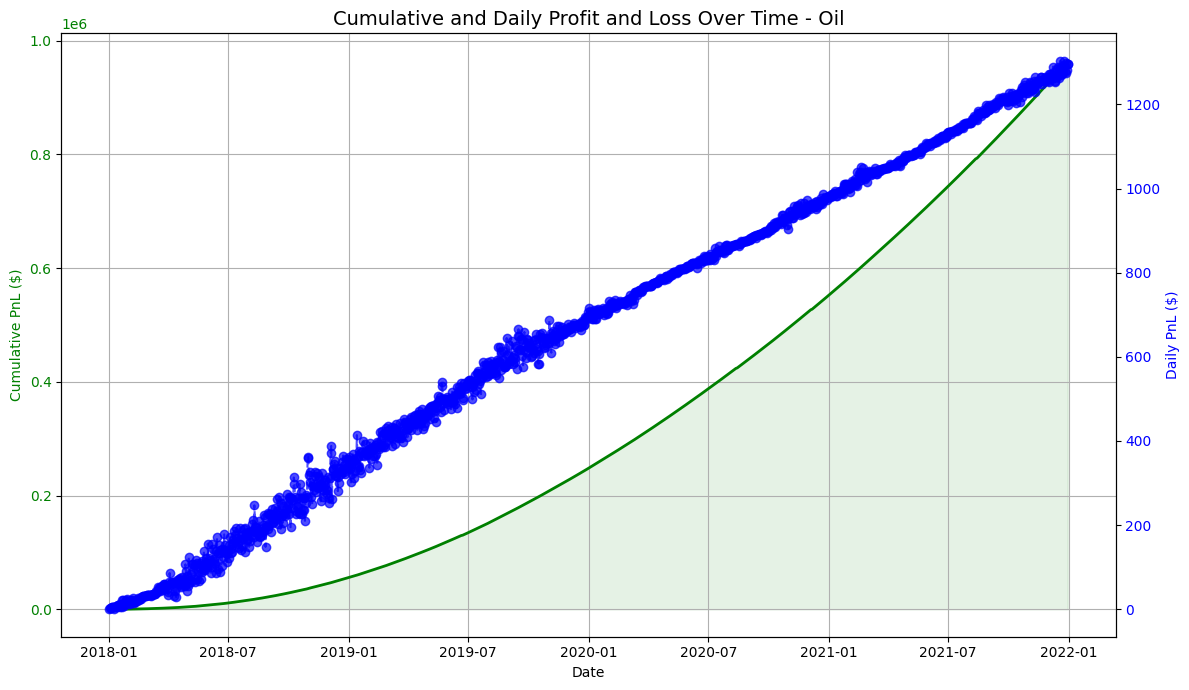


Running backtest for Palladium...
Closing position for palladium by executing -1 units.
            
******************
Final P&L for Palladium: $470273.60
            
******************


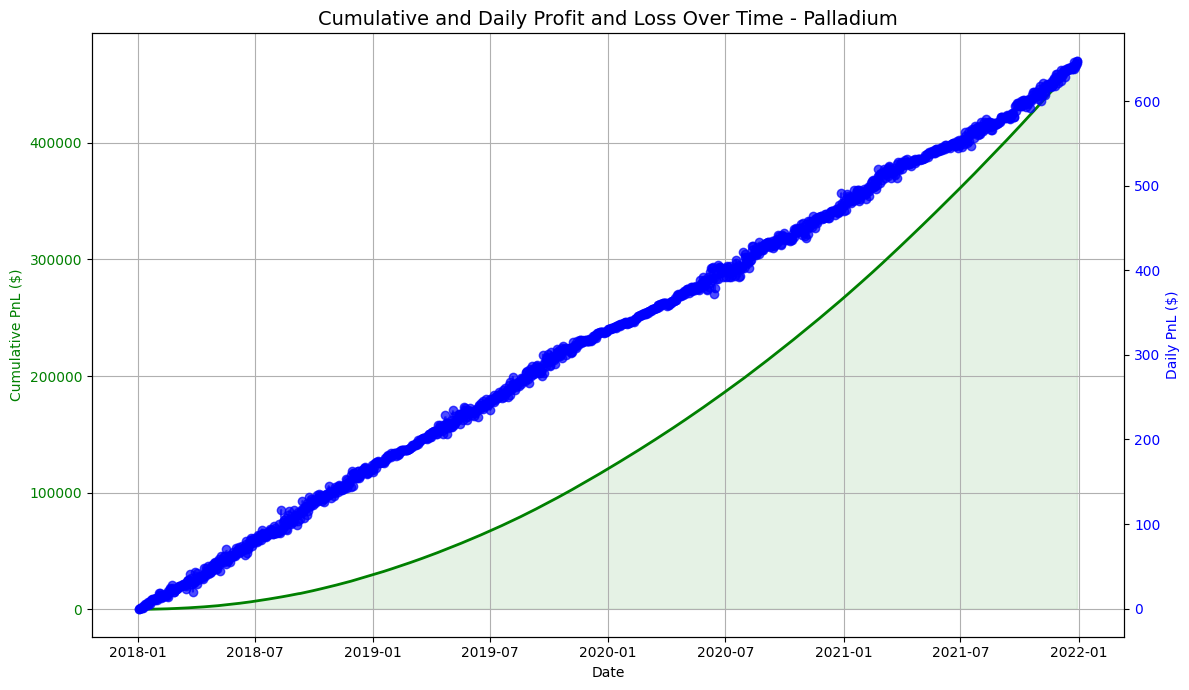


Running backtest for Semiconductor...
Closing position for semiconductor by executing -10 units.
            
******************
Final P&L for Semiconductor: $164735.10
            
******************


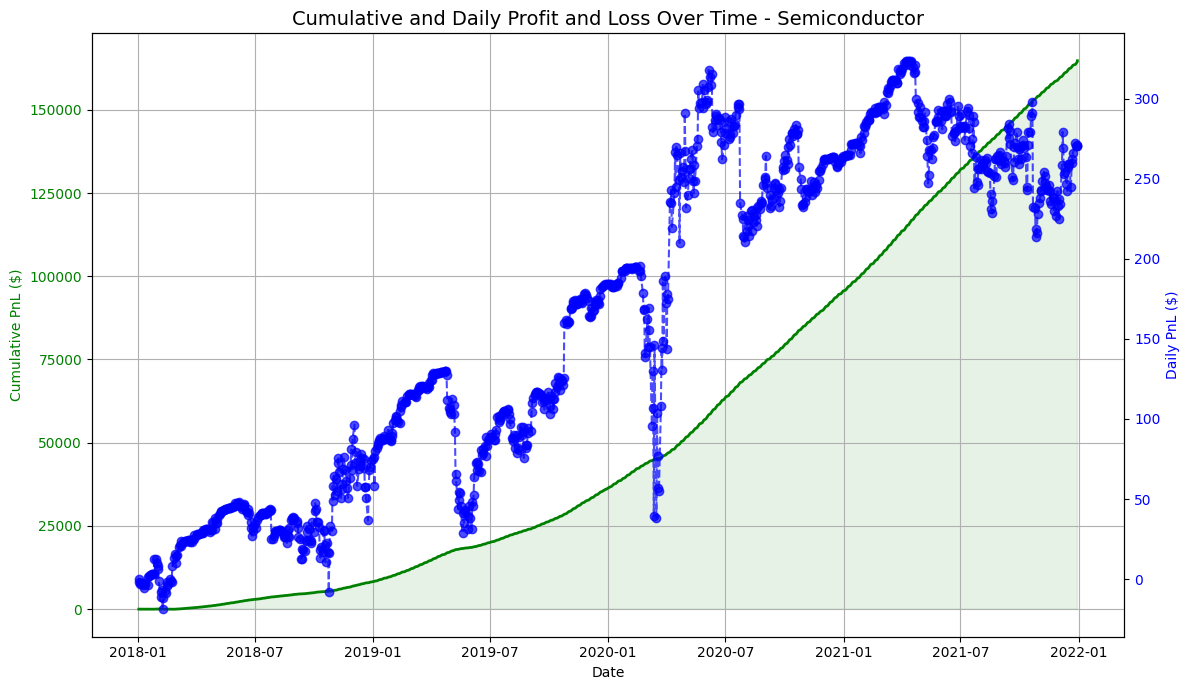

In [33]:
oil_data= cleaned_data_dict['oil'].copy()
palladium_data= cleaned_data_dict['palladium'].copy()
bread_data= cleaned_data_dict['bread'].copy()

butter_data= cleaned_data_dict['butter'].copy()
semiconductor_data= cleaned_data_dict['semiconductor'].copy()



# --- Oil Data ---
oil_data.columns = pd.MultiIndex.from_tuples([(col, 'oil') for col in oil_data.columns])
backtester_oil = Backtester(tickers=['oil'])
print("Running backtest for Oil...")
backtester_oil.run_backtest(oil_data, signal_oil)

# Close positions at the end
last_date_oil = oil_data.index[-1]
for ticker in backtester_oil.tickers:
    avg_price, quantity, last_timestamp = backtester_oil.holdings[ticker]
    if quantity != 0:
        close_signal = Signal(-quantity)
        backtester_oil.execute_signal(last_date_oil, ticker, close_signal, oil_data)
        print(f"Closing position for {ticker} by executing {close_signal.quantity} units.")

# Recalculate final P&L
daily_pl = backtester_oil.calculate_end_of_day_pl(oil_data, last_date_oil)
backtester_oil.daily_pl_log.append({"date": last_date_oil, "p/l": daily_pl})
cumulative_pnl = sum(entry['p/l'] for entry in backtester_oil.daily_pl_log)


print("            ")
print('******************')
# **Print final P&L**
print(f"Final P&L for Oil: ${cumulative_pnl:.2f}")
print("            ")
print('******************')
# Print results
#backtester_oil.print_transaction_log()
#backtester_oil.print_daily_pl_log()
plot_pnl(backtester_oil, 'Oil')






# --- Palladium Data ---
palladium_data.columns = pd.MultiIndex.from_tuples([(col, 'palladium') for col in palladium_data.columns])
backtester_palladium = Backtester(tickers=['palladium'])
print("\nRunning backtest for Palladium...")
backtester_palladium.run_backtest(palladium_data, signal_palladium)

# Close positions at the end
last_date_palladium = palladium_data.index[-1]
for ticker in backtester_palladium.tickers:
    avg_price, quantity, last_timestamp = backtester_palladium.holdings[ticker]
    if quantity != 0:
        close_signal = Signal(-quantity)
        backtester_palladium.execute_signal(last_date_palladium, ticker, close_signal, palladium_data)
        print(f"Closing position for {ticker} by executing {close_signal.quantity} units.")

# Recalculate final P&L
daily_pl = backtester_palladium.calculate_end_of_day_pl(palladium_data, last_date_palladium)
backtester_palladium.daily_pl_log.append({"date": last_date_palladium, "p/l": daily_pl})
cumulative_pnl = sum(entry['p/l'] for entry in backtester_palladium.daily_pl_log)

print("            ")
print('******************')
# **Print final P&L**
print(f"Final P&L for Palladium: ${cumulative_pnl:.2f}")
print("            ")
print('******************')
# Print results
#backtester_palladium.print_transaction_log()
#backtester_palladium.print_daily_pl_log()
plot_pnl(backtester_palladium, 'Palladium')






# --- Semiconductor Data ---
semiconductor_data.columns = pd.MultiIndex.from_tuples([(col, 'semiconductor') for col in semiconductor_data.columns])
backtester_semiconductor = Backtester(tickers=['semiconductor'])
print("\nRunning backtest for Semiconductor...")
backtester_semiconductor.run_backtest(semiconductor_data, signal_semiconductors)

# Close positions at the end
last_date_semiconductor = semiconductor_data.index[-1]
for ticker in backtester_semiconductor.tickers:
    avg_price, quantity, last_timestamp = backtester_semiconductor.holdings[ticker]
    if quantity != 0:
        close_signal = Signal(-quantity)
        backtester_semiconductor.execute_signal(last_date_semiconductor, ticker, close_signal, semiconductor_data)
        print(f"Closing position for {ticker} by executing {close_signal.quantity} units.")

# Recalculate final P&L
daily_pl = backtester_semiconductor.calculate_end_of_day_pl(semiconductor_data, last_date_semiconductor)
backtester_semiconductor.daily_pl_log.append({"date": last_date_semiconductor, "p/l": daily_pl})
cumulative_pnl = sum(entry['p/l'] for entry in backtester_semiconductor.daily_pl_log)

# **Print final P&L**
print("            ")
print('******************')
print(f"Final P&L for Semiconductor: ${cumulative_pnl:.2f}")
print("            ")
print('******************')

# Print results
# backtester_semiconductor.print_transaction_log()
# backtester_semiconductor.print_daily_pl_log()
plot_pnl(backtester_semiconductor, 'Semiconductor')







